In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser 

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.hour.str.slice(1, 3).astype(int)

0         2
1         1
2        19
3        16
4        18
5         9
6         2
7         3
8        14
9        18
10        4
11       11
12        6
13       19
14        4
15       18
16       16
17       21
18        5
19       17
20        9
21        4
22       17
23        2
24       20
25       18
26       16
27        1
28       11
29       17
         ..
49970    15
49971    11
49972    15
49973    18
49974    20
49975    18
49976    20
49977    15
49978    17
49979    14
49980     7
49981     4
49982     2
49983    13
49984    16
49985    23
49986    18
49987    19
49988     2
49989    17
49990    17
49991    22
49992    15
49993     2
49994    19
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [6]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [7]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])

In [8]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


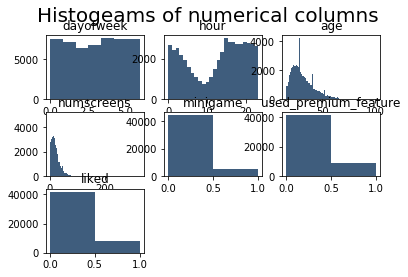

In [9]:
plt.suptitle('Histogeams of numerical columns', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(3, 3, i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i-1])
  
  vals = np.size(dataset2.iloc[:,i-1].unique())
  
  plt.hist(dataset2.iloc[:,i-1], bins = vals, color = '#3F5D7D')

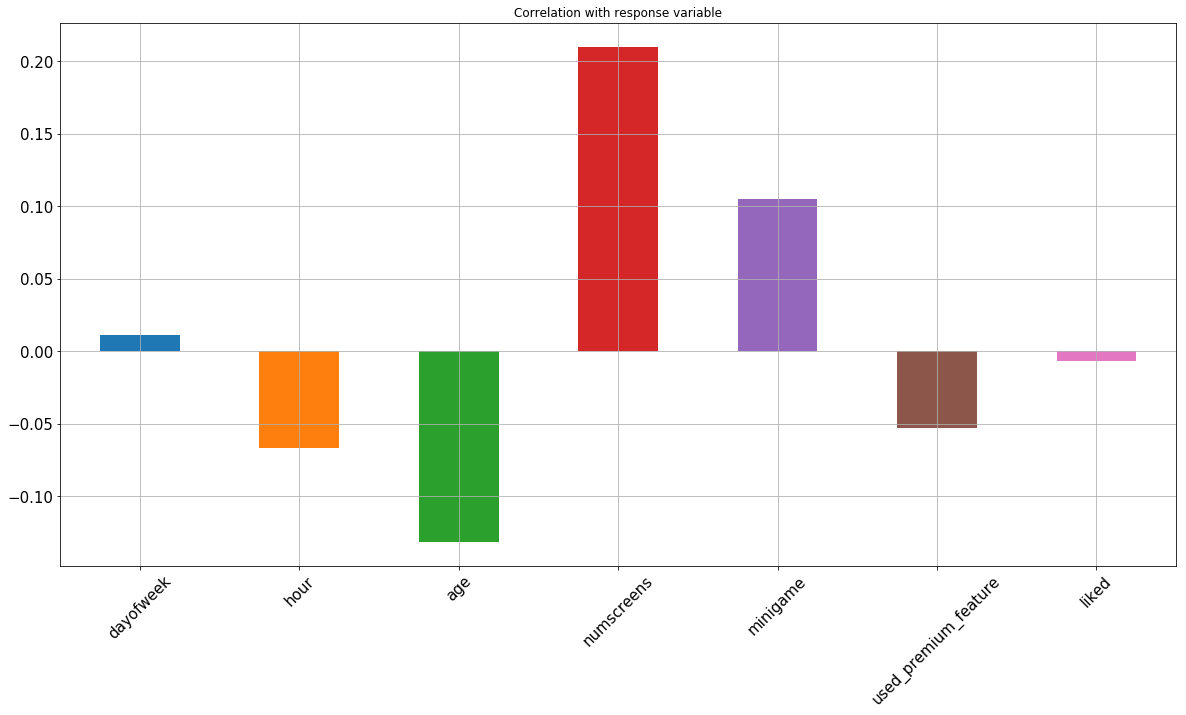

In [10]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),
                                            title = 'Correlation with response variable',
                                            fontsize = 15, rot=45,
                                            grid = True)

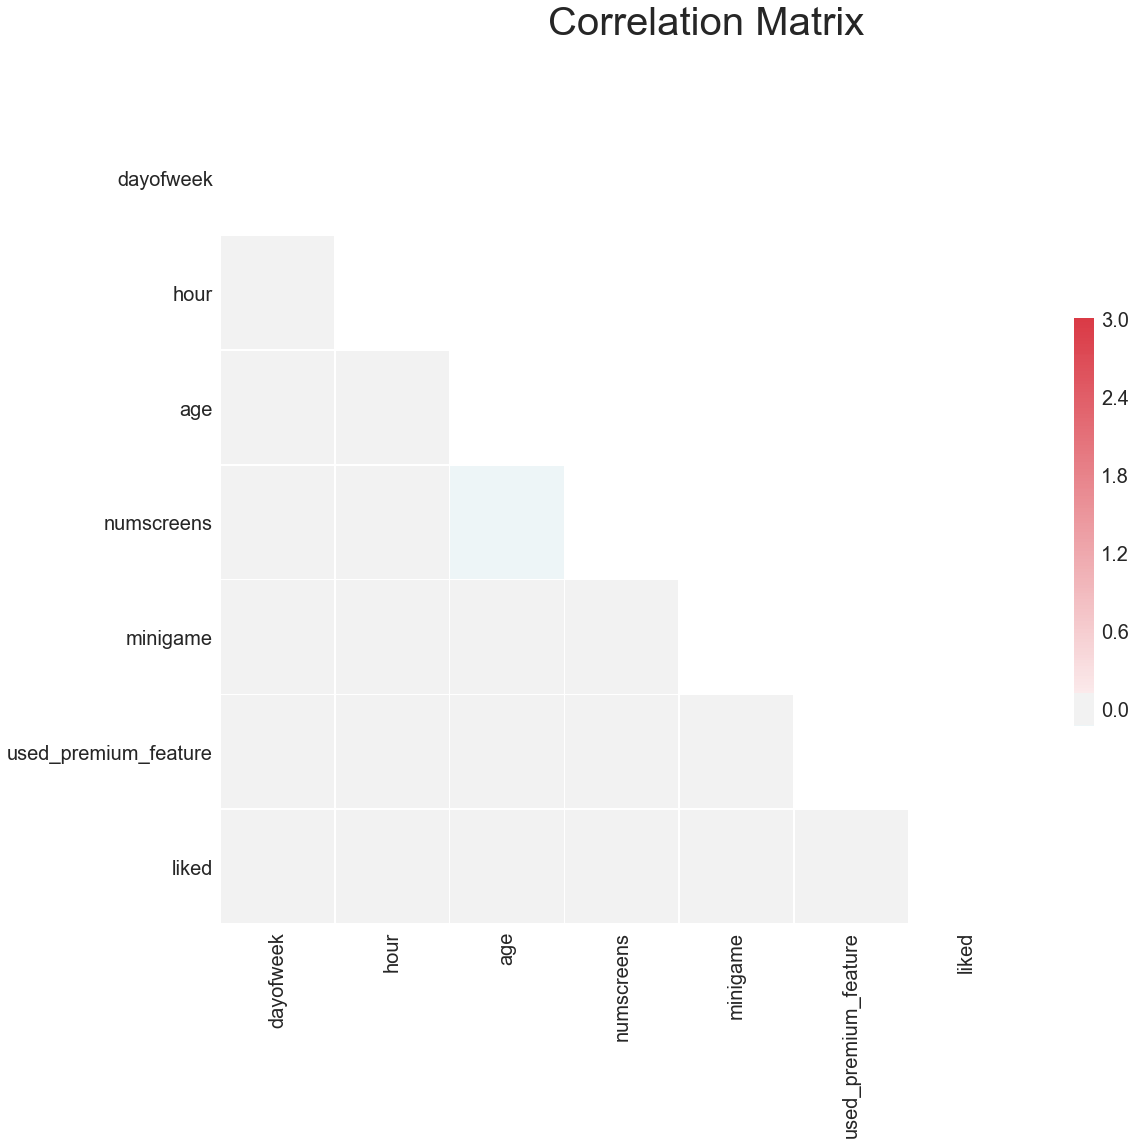

In [11]:
sns.set(style='white', font_scale=2)

#Compute correlation matrix
corr = dataset2.corr()

#Generate a mask for upper traingle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize=40)

#custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0, square = True, linewidth=.5, cbar_kws = {"shrink": .5})

In [12]:
corr

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


In [13]:
#Feature Engineering for response time
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [14]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]

In [15]:
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [16]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

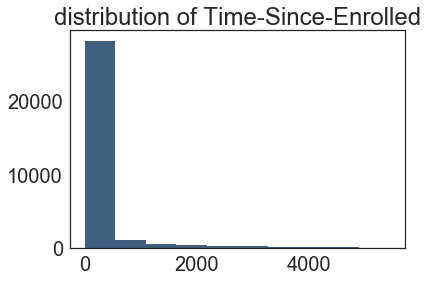

In [17]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('distribution of Time-Since-Enrolled')
plt.show()

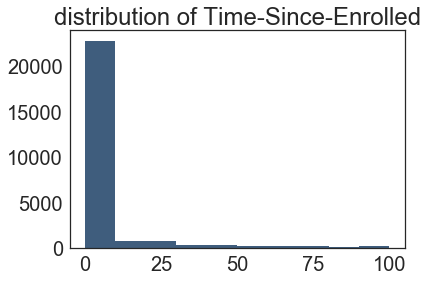

In [18]:
#above plot shows that majority of enrollment done in first 500 hrs but it is possible that it is done in first 100 hours itself,
#so we check it in range of 0 to 100
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0,100])
plt.title('distribution of Time-Since-Enrolled')
plt.show()

In [19]:
#above shows it happend in first 10hrs itself
#but we will take 48hrs or 2 days and max time 

dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['difference', 'enrolled_date', 'first_open'])

In [20]:
#feature engineering for screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [21]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [22]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")

In [23]:
dataset["other"] = dataset.screen_list.str.count(",")

In [24]:
dataset = dataset.drop(columns=["screen_list"])

In [25]:
#funnels
saving_screens = ["Saving1",
                 "Saving2",
                 "Saving2Amount",
                 "Saving4",
                 "Saving5",
                 "Saving6",
                 "Saving7",
                 "Saving8",
                 "Saving9",
                 "Saving10"]

In [26]:
dataset["SavingsCount"] = dataset[saving_screens].sum(axis = 1)
dataset = dataset.drop(columns= saving_screens)

In [27]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [28]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [30]:
#dataset.to_csv("update_appdata10.csv", index=False)

In [32]:
#Part 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

dataset3 = pd.read_csv('update_appdata10.csv')

In [33]:
response = dataset3["enrolled"]

In [35]:
dataset3 = dataset3.drop(columns = 'enrolled')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset3, response,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [38]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')

test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [39]:
#Feature Scaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [40]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [41]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [42]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [43]:
X_train = X_train2
X_test = X_test2

In [44]:
#Model Building
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty = 'l1')
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [47]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [48]:
accuracy

0.7681

In [49]:
precision

0.7618952017667135

In [50]:
recall

0.7700892857142857

In [51]:
f1_score(y_test, y_pred)

0.7659703300030276

Test Data Accuracy: 0.7681


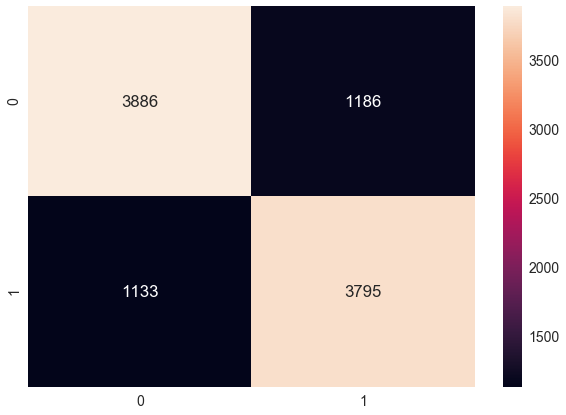

In [52]:
df_cm = pd.DataFrame(cm, index=(0,1), columns= (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10)
print("Logistic regression: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()*2))

Logistic regression: 0.767 (+/- 0.010)


In [54]:
#Formatting the final results
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted_results'] =y_pred
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
